# 준비

<Axes: >

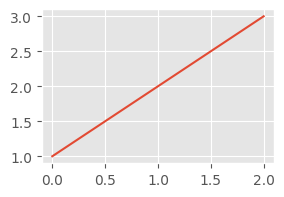

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

plt.style.use('ggplot')  
pd.Series([1,2,3]).plot(figsize=(3,2))

# 데이터 확인

In [3]:
df = pd.read_csv('advertising.csv')

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## 시각화

#### 산점도

<Axes: xlabel='TV', ylabel='Sales'>

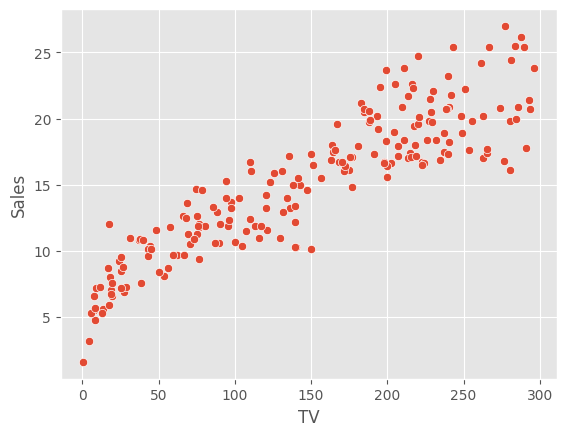

In [6]:
sns.scatterplot(data=df, x='TV', y='Sales')

#### 산점도 + 회귀선

<Axes: xlabel='TV', ylabel='Sales'>

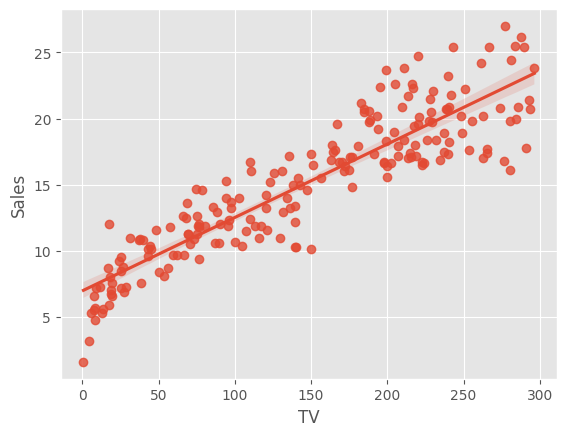

In [7]:
sns.regplot(data=df, x='TV', y='Sales')

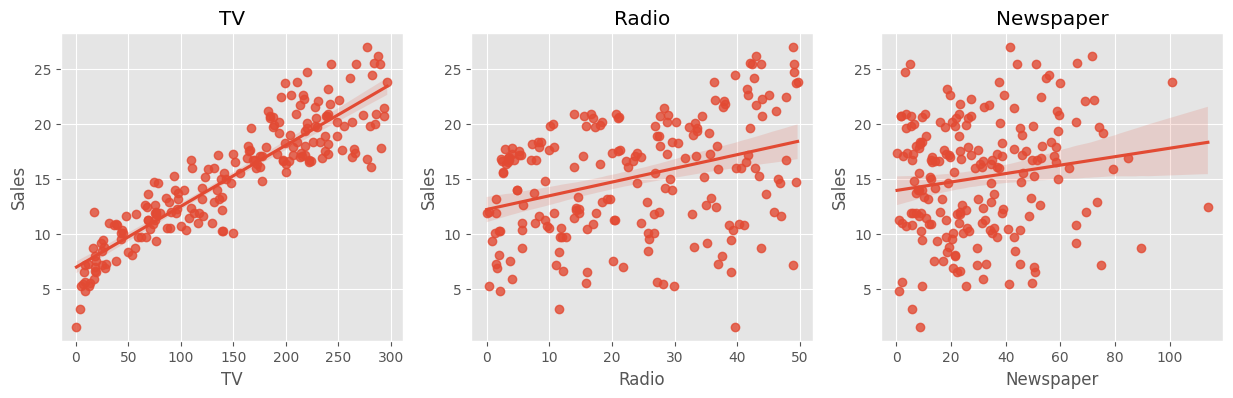

In [10]:
# 한 화면에 표시하기

plt.figure(figsize=(15,4))


# tv 광고비에 따른 판매량
plt.subplot(1,3,1)
sns.regplot(data=df, x='TV', y='Sales')
plt.title("TV")

# Radio 광고비에 따른 판매량
plt.subplot(1,3,2)
sns.regplot(data=df, x='Radio', y='Sales')
plt.title("Radio")

# Newspaer 광고비에 따른 판매량
plt.subplot(1,3,3)
sns.regplot(data=df, x='Newspaper', y='Sales')
plt.title("Newspaper");

## 마지막에 ; 또는 pass 적으면 < > 가 안나옴 
## 일반 python 에서는 plt.show() 를 해야 그래프를 보여줌 

## 상관계수

<Axes: >

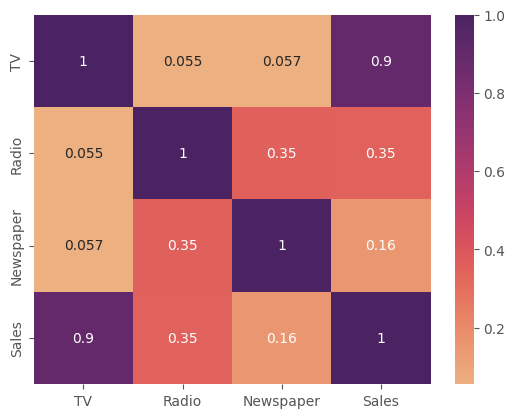

In [23]:
# 상관계수 히트맵 시각화
## df.corr() - 표로 보기
## df[['TV',"Newspaper"]].corr() - 특정 부분만 보기
sns.heatmap(df.corr(), cmap='flare', annot=True)

# 데이터 분석 - 단순선형회귀(TV-Sales)


In [27]:
# 변수 입력
X = df[['TV']]  #독립변수는 2차원으로 설정, 독립변수는 대체로 대문자 x 사용
y = df['Sales']
pass

## 데이터 분리

In [81]:
# 훈련세트, 테스트세트 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)  # 변수의 순서에 주의, 각각 np.array 형태로 나옴 

X_train.shape, X_test.shape, y_train.shape, y_test.shape # 변수 순서 확인 차원/개수로 구분

((150, 1), (50, 1), (150,), (50,))

In [82]:

print(X_test)

        TV
95   163.3
15   195.4
30   292.9
158   11.7
128  220.3
115   75.1
69   216.8
170   50.0
174  222.4
45   175.1
66    31.5
182   56.2
165  234.5
78     5.4
186  139.5
177  170.2
56     7.3
152  197.6
82    75.3
68   237.4
124  229.5
16    67.8
148   38.0
93   250.9
65    69.0
60    53.5
84   213.5
67   139.3
125   87.2
132    8.4
9    199.8
18    69.2
55   198.9
75    16.9
150  280.7
104  238.2
135   48.3
137  273.7
164  117.2
76    27.5
79   116.0
197  177.0
38    43.1
24    62.3
122  224.0
195   38.2
29    70.6
19   147.3
143  104.6
86    76.3


Text(0.5, 0, 'TV')

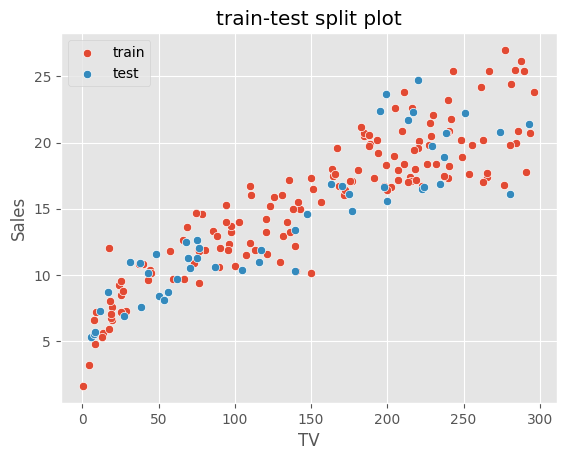

In [31]:
# 훈련세트, 테스트세트 분할 확인
sns.scatterplot(x=X_train['TV'], y=y_train, label='train')
sns.scatterplot(x=X_test['TV'], y=y_test, label='test')
plt.legend() # seaborn은 내장되어 있어서 안해도 됨, matplotlib에서는 필요 
plt.title("train-test split plot")
plt.xlabel('TV') # seaborn은 내장되어 있어서 안해도 됨, matplotlib에서는 필요 

## 모델 생성 및 훈련

### 모델 생성

In [33]:
# 단순선형회귀 모델 import
from sklearn.linear_model import LinearRegression
# 모델 생성
model = LinearRegression()


### 모델 훈련

In [35]:
# 훈련데이터로 모델 훈련
model.fit(X_train, y_train)

LinearRegression()

## 평가

### 테스트 세트로 평가

In [36]:
# 평가 방법 선택 : MSE, MAE, R2
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

# 테스트 데이터의 예측값 
pred = model.predict(X_test)  ## ndarray 형태로 나옴 

# 예측값과 실제값의 차이 평가
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f'MSE : {mse:.2f}')
print(f'RMSE : {rmse:.2f}')
print(f'MAE : {mae:.2f}')
print(f'R2 : {r2:.2f}')

MSE : 5.51
RMSE : 2.35
MAE : 1.87
R2 : 0.80


In [46]:
print(pred)

[16.14347417 17.92138181 23.32156857  7.74687609 19.30050643 11.25838215
 19.10665357  9.86818022 19.41681814 16.79703523  8.8435294  10.21157671
 20.08699517  7.39794095 14.82527473 16.52564123  7.50317536 18.04323218
 11.26945945 20.24761611 19.81006251 10.85406047  9.20354185 20.99533427
 10.92052431 10.06203308 18.92387802 14.81419743 11.92855917  7.56410054
 18.16508254 10.93160162 18.11523467  8.03488605 22.64585289 20.29192533
  9.77402312 22.25814718 13.5901551   8.62198328 13.52369126 16.90226964
  9.48601316 10.54943455 19.50543659  9.21461916 11.00914276 15.25728968
 12.89228481 11.32484598]


### 결과 값 확인

In [37]:
df_pred = pd.DataFrame({'X_test':X_test['TV'],
                        'y_test':y_test,
                        'y_pred':pred})
df_pred['error'] = df_pred['y_test'] - df_pred['y_pred']
df_pred.head(10)


,X_test,y_test,y_pred,error
95,163.3,16.9,16.143474,0.756526
15,195.4,22.4,17.921382,4.478618
30,292.9,21.4,23.321569,-1.921569
158,11.7,7.3,7.746876,-0.446876
128,220.3,24.7,19.300506,5.399494
115,75.1,12.6,11.258382,1.341618
69,216.8,22.3,19.106654,3.193346
170,50.0,8.4,9.868180,-1.468180
174,222.4,16.5,19.416818,-2.916818
45,175.1,16.1,16.797035,-0.697035


### 평가점수 수동계산 해보기

In [39]:
mae_m = abs(df_pred['error']).mean()
mse_m = np.square(df_pred['error']).mean()
rmse_m = np.sqrt(mse_m)

rss = np.square(df_pred['y_test'] - df_pred['y_pred']).sum()
tss = np.square(df_pred['y_test'] - df_pred['y_test'].mean()).sum()
r2_m = 1-(rss/tss)

print(f'MSE_M : {mse_m:.2f}')
print(f'RMSE_M : {rmse_m:.2f}')
print(f'MAE_M : {mae_m:.2f}')
print(f'R2 : {r2_m:.2f}')


MSE_M : 5.51
RMSE_M : 2.35
MAE_M : 1.87
R2 : 0.80


### 모델의 학습 결과 보기

In [56]:
print(f'회귀계수 : {model.coef_}')
print(f'절편 : {model.intercept_}')
print(f'회귀식 : {model.coef_[0]} * TV + {model.intercept_}') ## 회귀계수 * X + 절편 

회귀계수 : [0.05538653]
절편 : 7.098853680118275
회귀식 : 0.05538653085519158 * TV + 7.098853680118275


In [79]:
type(X_test)

pandas.core.frame.DataFrame

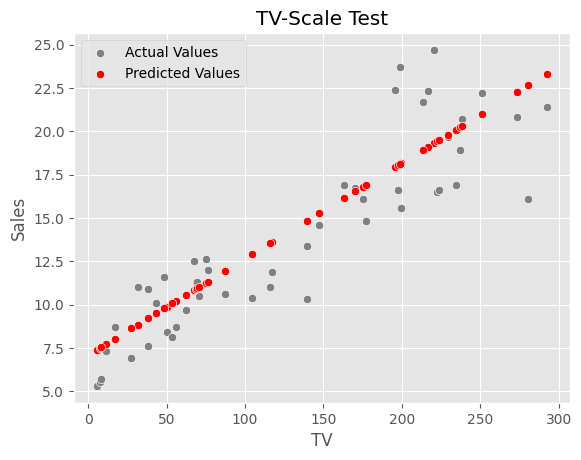

In [43]:
## 시각화로 결과 보기
sns.scatterplot(x=X_test['TV'], y=y_test, color='grey', label='Actual Values')
sns.scatterplot(x=X_test['TV'], y=pred, color='red', label='Predicted Values')
plt.title('TV-Scale Test')
pass

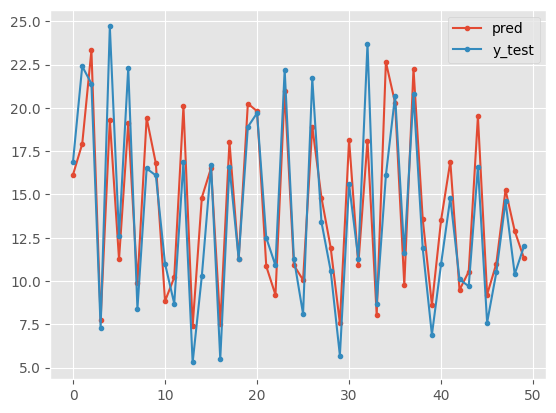

In [60]:
## 시각화로 결과 보기 2
plt.plot(pred, marker='.', label='pred')
plt.plot(np.array(y_test), marker='.', label='y_test') 
   ## 원래 y_test는 시리즈형태이므로 nparray형태로 바꿈, y_test.values로도 가능
plt.legend()
pass

# 실제 데이터로 예측하기

In [55]:
# 궁금한 내용 : TV 광고비를 100 썼을때 예측값
tv = 100
print(f'TV광고비 : ${tv:.3f}')

# 학습된 모델 사용
tv_df = pd.DataFrame([[tv]], columns=['TV'])  ## 그냥 tv를 넣어도 되지만 DF로 넣으면 자잘한 오류가 없음 
print(f'모델예측 값 : {model.predict(tv_df)}')

# 수동 공식에 대입
print(f'공식 값 : {model.coef_ * tv + model.intercept_}')


TV광고비 : $100.000
모델예측 값 : [12.63750677]
공식 값 : [12.63750677]


# 데이터 분석 - 다중 선형회귀

## 변수 선택, 분포 파악

In [57]:
## 독립변수, 종속변수 선택

X2 = df[['TV', 'Radio', 'Newspaper']]
y2 = df['Sales']


<Axes: >

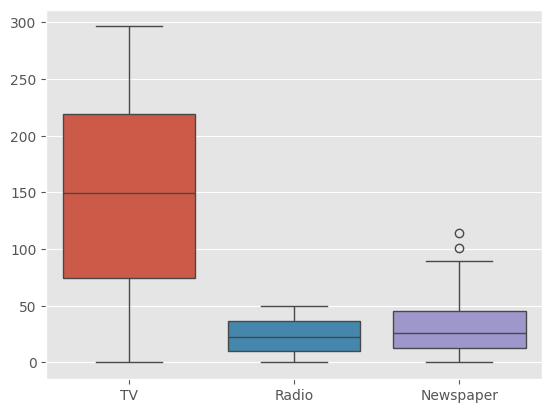

In [58]:
sns.boxplot(X2)  ## 분포는 히스토그램이나 박스플롯 주로 활용

## 데이터 스케일링

In [90]:
%whos   # 현재 사용중인 변수명 확인

No variables match your requested type.


In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X2_scaled = scaler.fit_transform(X2)
  # scaler.fit(X2)
  # X_scaled = scaler.transform(X2)

print(f'스케일링 된 각 변수의 평균 : {X2_scaled[:, 0].mean()}, {X2_scaled[:,1].mean()}, {X2_scaled[:,2].mean()}')
print(f'스케일링 된 각 변수의 표준편차 : {X2_scaled[:,0].std()}, {X2_scaled[:,1].std()}, {X2_scaled[:,2].std()}')


스케일링 된 각 변수의 평균 : 1.2212453270876723e-16, -4.529709940470639e-16, 2.220446049250313e-16
스케일링 된 각 변수의 표준편차 : 1.0, 1.0, 0.9999999999999999


In [87]:
type(X2_scaled)

numpy.ndarray

## 데이터 분리

In [66]:
# 훈련세트, 테스트세트 분할

X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, random_state=42)
print(X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)

(150, 3) (50, 3) (150,) (50,)


## 모델 생성 및 학습

In [70]:
# 모델 생성
model2 = LinearRegression()

# 모델 학습
model2.fit(X2_train, y2_train)

LinearRegression()

## 모델 평가

### 테스트 데이터로 평가

In [71]:
# 테스트 데이터로 예측
pred2 = model2.predict(X2_test)

In [74]:
# 모델 평가
mse2 = mean_squared_error(y2_test, pred2)
rmse2 = root_mean_squared_error(y2_test, pred2)
mae2 = mean_absolute_error(y2_test, pred2)
r2_2 = r2_score(y2_test, pred2)

print(f'다중회귀 MSE : {mse2:.2f}')
print(f'다중회귀 RMSE : {rmse2:.2f}')
print(f'다중회귀 MAE : {mae2:.2f}')
print(f'다중회귀 R2 : {r2_2:.2f}')

다중회귀 MSE : 2.40
다중회귀 RMSE : 1.55
다중회귀 MAE : 1.12
다중회귀 R2 : 0.91


In [78]:
type(X2_test)

numpy.ndarray

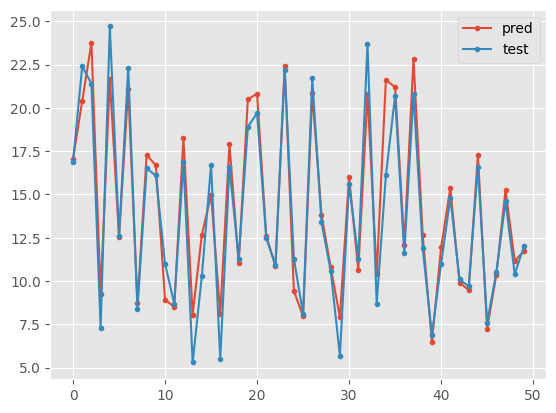

In [95]:
# 시각화
plt.plot(pred2, marker='.', label='pred')
plt.plot(np.array(y2_test), marker='.', label='test')
plt.legend()

### 모델의 학습 결과 보기

In [85]:
print(f'회귀계수 : {model2.coef_}')
print(f'절편 : {model2.intercept_}')

w1 = model2.coef_[0]
w2 = model2.coef_[1]
w3 = model2.coef_[2]

b = model2.intercept_

print(f'회귀식 : {w1} * tv + {w2} * radio + {w3} * nespaper + {b}')

회귀계수 : [4.67709227 1.4774023  0.09352121]
절편 : 15.22473459736965
회귀식 : 4.677092268978724 * tv + 1.4774023036363388 * radio + 0.0935212124232997 * nespaper + 15.22473459736965


# 실제 데이터로 예측하기

In [89]:
new_data = [[175, 15, 2]]

new_df = pd.DataFrame(new_data, columns=['TV', 'Radio', 'Newspaper'])
new_data_scaled = scaler.transform(new_df)
model2.predict(new_data_scaled)


array([15.80426509])

# test

In [92]:
test_x = df[['Radio', 'Newspaper']]
test_y = df['Sales']


In [93]:
testx_train, testx_test, testy_train, testy_test = train_test_split(test_x, test_y)


In [94]:
type(testx_train)

pandas.core.frame.DataFrame

# 데이터 분석 - 다항회귀

## 데이터 보기

In [96]:
## 독립변수, 종속변수 선택

X2 = df[['TV', 'Radio', 'Newspaper']]
y2 = df['Sales']


## 다항식 조합 생성

In [108]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=9)
X_poly = poly.fit_transform(X2)
print(f'특성의 크기 : {X_poly.shape}')


특성의 크기 : (200, 220)


## 스케일링

In [109]:
scaler2 = StandardScaler()
X_poly_scaled = scaler2.fit_transform(X_poly)


In [110]:
print(X_poly_scaled)

[[ 0.          0.96985227  0.98152247 ...  0.25784498  0.12068571
   0.03133696]
 [ 0.         -1.19737623  1.08280781 ... -0.13042404 -0.1207832
  -0.11519076]
 [ 0.         -1.51615499  1.52846331 ...  0.45873669  0.17776779
   0.03329526]
 ...
 [ 0.          0.34981006 -0.942899   ... -0.15258204 -0.1292414
  -0.11836665]
 [ 0.          1.59456522  1.26512143 ...  0.21896533  0.06555729
  -0.01790523]
 [ 0.          0.99320602 -0.99016549 ... -0.15258203 -0.12924139
  -0.11836665]]


## 데이터 분할

In [105]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X_poly_scaled, y2, random_state=42)
print(X3_train.shape, X3_test.shape, y3_train.shape, y3_test.shape)

(150, 220) (50, 220) (150,) (50,)


## 모델 생성 및 학습

In [111]:
model_poly = LinearRegression()
model_poly.fit(X3_train, y3_train)


LinearRegression()

## 모델 평가

In [113]:
print(f'train score : {model_poly.score(X3_train, y3_train)}')
print(f'test score : {model_poly.score(X3_test, y3_test)}')

train score : 1.0
test score : -14619695.462744264


9차항으로 강제로 특성을 많이 늘렸기 때문에 과적합이 발생했음을 알 수 있음 

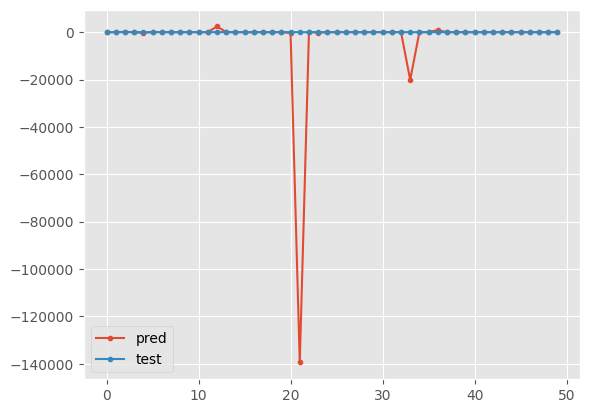

In [119]:
pred3 = model_poly.predict(X3_test)

# 시각화
plt.plot(pred3, marker='.', label='pred')
plt.plot(np.array(y3_test), marker='.', label='test')
plt.legend()

# 규제 활용하기 - Ridge

## 다항식 조합 생성

In [114]:
from sklearn.preprocessing import PolynomialFeatures

poly2 = PolynomialFeatures(degree=9)
X_poly2 = poly2.fit_transform(X2)
print(f'특성의 크기 : {X_poly2.shape}')

특성의 크기 : (200, 220)


## 스케일링

In [115]:
scaler3 = StandardScaler()
X_poly_scaled2 = scaler3.fit_transform(X_poly2)

## 데이터 분할

In [116]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X_poly_scaled2, y2, random_state=42)
print(X4_train.shape, X4_test.shape, y4_train.shape, y4_test.shape)

(150, 220) (50, 220) (150,) (50,)


## 모델 생성 및 학습

In [117]:
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha=10)  # alpha : 규제강도
model_ridge.fit(X4_train, y4_train)


Ridge(alpha=10)

## 모델 평가

In [118]:
print(f'train score : {model_ridge.score(X4_train, y4_train)}')
print(f'test score : {model_ridge.score(X4_train, y4_train)}')

train score : 0.9216197291137791
test score : 0.9216197291137791


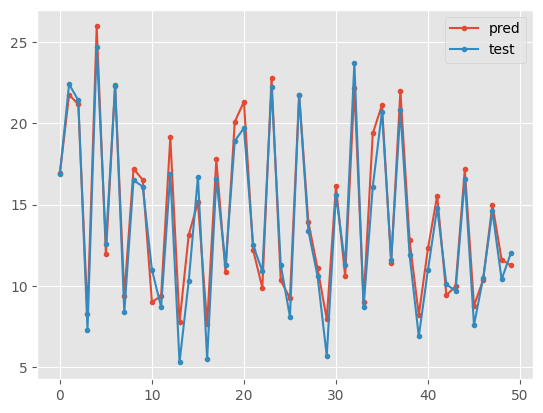

In [120]:
pred4 = model_ridge.predict(X4_test)

# 시각화
plt.plot(pred4, marker='.', label='pred')
plt.plot(np.array(y4_test), marker='.', label='test')
plt.legend()